787. Cheapest Flights Within K Stops
Solved
Medium
Topics
Companies
There are n cities connected by some number of flights. You are given an array flights where flights[i] = [fromi, toi, pricei] indicates that there is a flight from city fromi to city toi with cost pricei.

You are also given three integers src, dst, and k, return the cheapest price from src to dst with at most k stops. If there is no such route, return -1.

787. Cheapest Flights Within K Stops
Solved
Medium
Topics
Companies
There are n cities connected by some number of flights. You are given an array flights where flights[i] = [fromi, toi, pricei] indicates that there is a flight from city fromi to city toi with cost pricei.

You are also given three integers src, dst, and k, return the cheapest price from src to dst with at most k stops. If there is no such route, return -1.

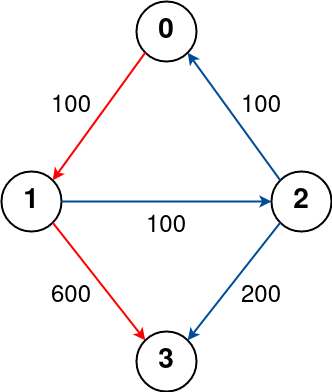

Input: n = 4, flights = [[0,1,100],[1,2,100],[2,0,100],[1,3,600],[2,3,200]], src = 0, dst = 3, k = 1
Output: 700
Explanation:
The graph is shown above.
The optimal path with at most 1 stop from city 0 to 3 is marked in red and has cost 100 + 600 = 700.
Note that the path through cities [0,1,2,3] is cheaper but is invalid because it uses 2 stops.

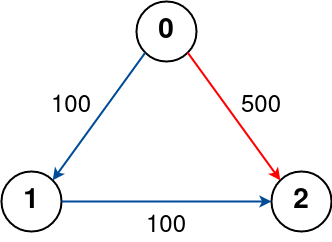

Input: n = 3, flights = [[0,1,100],[1,2,100],[0,2,500]], src = 0, dst = 2, k = 0
Output: 500
Explanation:
The graph is shown above.
The optimal path with no stops from city 0 to 2 is marked in red and has cost 500.
 

Constraints:

1 <= n <= 100
0 <= flights.length <= (n * (n - 1) / 2)
flights[i].length == 3
0 <= fromi, toi < n
fromi != toi
1 <= pricei <= 104
There will not be any multiple flights between two cities.
0 <= src, dst, k < n
src != dst



In [ ]:
from typing import List
class Solution:
    def findCheapestPrice(self, n: int, flights: List[List[int]], src: int, dst: int, k: int) -> int:
        graph = defaultdict(list)
        for from_city, to_city, flight_cost in flights:
            graph[from_city].append((to_city, flight_cost))

        distances = [float("inf")] * n
        distances[src] = 0
        queue = collections.deque([(src, 0, 0)])  # (current_city, current_cost, current_stops)

        while queue:
            current_city, current_cost, current_stops = queue.popleft()

            # Only proceed if the number of stops is within the limit
            if current_stops <= k:
                for next_city, additional_cost in graph[current_city]:
                    new_cost = current_cost + additional_cost

                    # Only consider this new path if it offers a cheaper cost to the destination
                    if new_cost < distances[next_city]:
                        distances[next_city] = new_cost
                        queue.append((next_city, new_cost, current_stops + 1))

        return distances[dst] if distances[dst] != float("inf") else -1
